# Project Name: Motorbike Ambulance Calls

<h3>Project description</h3>
Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.

<h3>Project Plan</h3>

<ol>
  <li>Getting acquainted with the data</li>
  <li>Data wrangling</li>
  <li>Descriptive statistics</li>
  <li>Exploratory data analysis</li>
  <li>Patterns and anomaly detection. Data cleaning</li>
  <li>Feature engineering</li>
  <li>Data modeling (Linear Regression)</li>
</ol> 



<h3>Import libraries</h3>

In [0]:
import pandas as pd
import io

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Math calculations
import numpy as np
from scipy import stats

# Removing seasonality from the data
import matplotlib.dates as mdates
from numpy import polyfit

# Feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h3>Import the dataset</h3> 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving motorbike_ambulance_calls.csv to motorbike_ambulance_calls (2).csv


# 1 Getting acquainted with the data

In [3]:
# Load the CSV file as a pandas DataFrame
data = pd.read_csv(io.StringIO(uploaded['motorbike_ambulance_calls.csv'].decode('utf-8')))
data.shape

(17379, 15)

<h3>Dataset characteristics</h3>

<table style="width:100%">
  <tr>
    <th>Column</th>
    <th>Field</th> 
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>index</td>
    <td>record index</td>
  </tr>
    <tr>
    <td>2</td>
    <td>date</td>
    <td>date format (YYYY/DD/MM)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>season</td>
    <td>season (1:spring, 2:summer, 3:autumn, 4:winter)</td>
  <tr>
    <td>4</td>
    <td>yr</td>
    <td>year (0: 2011, 1:2012)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>mnth</td>
    <td>month (1 to 12)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>hr</td>
    <td>hour (0 to 23)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>holiday</td>
    <td>whether day is holiday or not (1 - holiday, 0 - not holiday)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>weekday</td>
    <td>day of the week (1 - Monday)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>workingday</td>
    <td>if day is neither weekend nor holiday is 1, otherwise is 0</td>
  </tr>
    <tr>
    <td>10</td>
    <td>weathersit</td>
    <td>
      <ol>
      <li>Clear, Few clouds, Partly cloudy, Partly cloudy</li>
      <li>Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
      <li>Light Snow, Light Rain + Thunderstorm + Scattered clouds,<br> Light Rain + Scattered clouds</li>
      <li>Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
      </ol> 
    </td>
  </tr>
    <tr>
    <td>11</td>
    <td>temp</td>
    <td>normalized temperature in Celsius. The values are divided to 41 (max)</td>
  </tr>
    <tr>
    <td>12</td>
    <td>atemp</td>
    <td>normalized feeling temperature in Celsius. The values are divided to 50 (max)</td>
  </tr>
    <tr>
    <td>13</td>
    <td>hum</td>
    <td>normalized humidity. The values are divided to 100 (max)</td>
  </tr>
    <tr>
    <td>14</td>
    <td>windspeed</td>
    <td>normalized wind speed. The values are divided to 67 (max)</td>
  </tr>
    <tr>
    <td>15</td>
    <td>cnt</td>
    <td>count of total ambulance calls</td>
  </tr>
  




In [4]:
data.head(3)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
index         17379 non-null int64
date          17379 non-null object
season        17379 non-null object
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


There are 17379 observations in our dataset.  They were collected for 2 years from 2011 to 2012. It seems there are no missing values in there. Let's check this by calculating the sum of Nan values.

In [6]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Indeed, there are no missing values.<br>

Let's take a first look at the distribution of ambulance calls

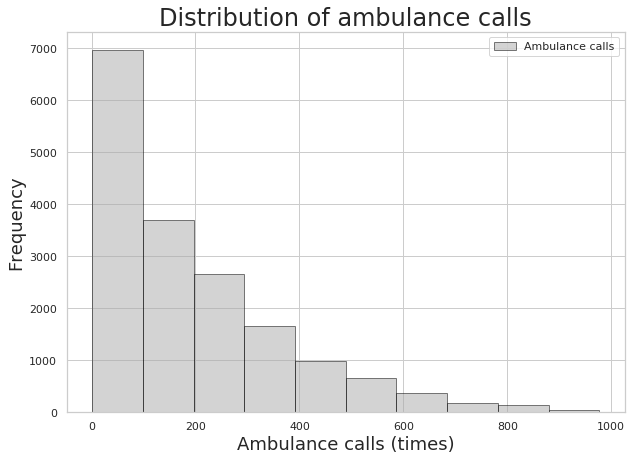

In [20]:
data.cnt.plot(kind='hist',color='darkgrey',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Ambulance calls'])
plt.title('Distribution of ambulance calls', size=24)
plt.xlabel('Ambulance calls (times)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

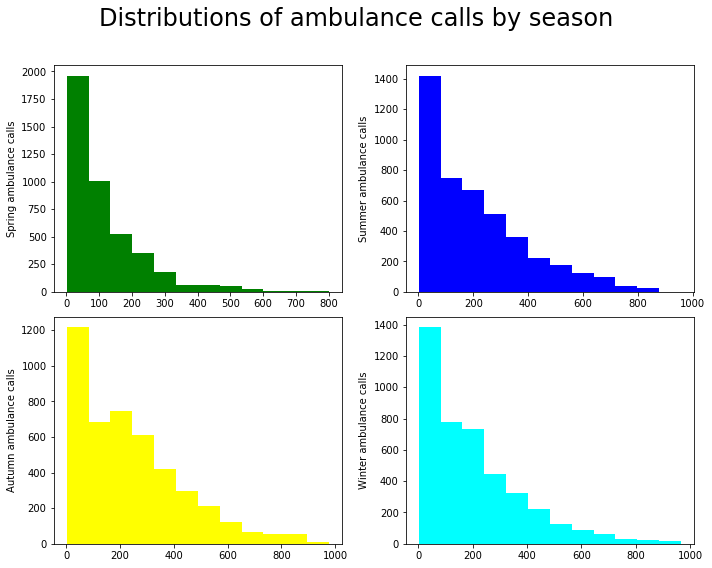

In [16]:
plt.style.use('seaborn-deep')
n_bins = 12
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Distributions of ambulance calls by season', fontsize=24)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(data.cnt[data['season'] == 'spring'], n_bins, histtype='bar', stacked=True, color='green')
ax0.set_ylabel('Spring ambulance calls')

ax1.hist(data.cnt[data['season'] == 'summer'], n_bins, histtype='bar', stacked=True, color='blue')
ax1.set_ylabel('Summer ambulance calls')

ax2.hist(data.cnt[data['season'] == 'autumn'], n_bins, histtype='bar', stacked=True, color='yellow')
ax2.set_ylabel('Autumn ambulance calls')

ax3.hist(data.cnt[data['season'] == 'winter'], n_bins, histtype='bar', stacked=True, color='cyan')
ax3.set_ylabel('Winter ambulance calls')

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

From the histograms, we can notice that:


1.   there is no Normal distribution of our target feature
2.   distributions by season differ from each other





Let's convert our date to DateTime format readable by python and set it as an index in our DataFrame so that it much easier visualize our time series.

In [4]:
for row in data:
    data['date'] = pd.to_datetime(data['date'])

data = data.set_index('date')
data.head(3)

,index,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
date,,,,,,,,,,,,,,
2011-01-01,1,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01,2,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01,3,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


Now we can visualize our time series and see how our target feature behaves itself during the time period. Also, let's compare the number of ambulance calls with a temperature and humidity degree.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


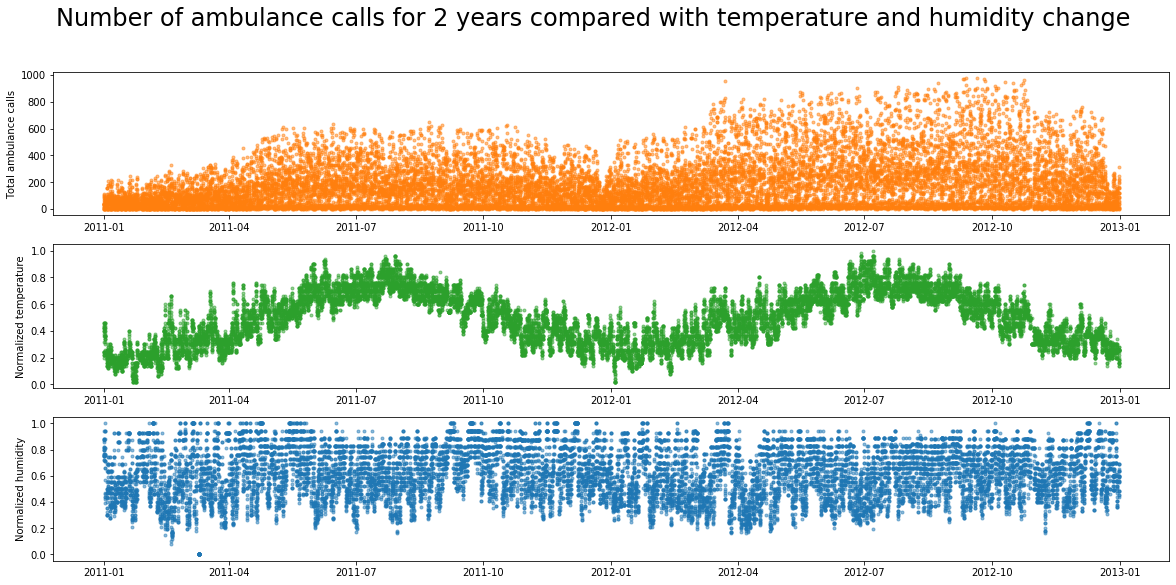

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(20, 9))
fig.suptitle("Number of ambulance calls for 2 years compared with temperature and humidity change", fontsize=24)

axes[0].plot(data['cnt'], marker='.', alpha=0.5, linestyle='None', color='#ff7f0e')
axes[0].set_ylabel('Total ambulance calls')

axes[1].plot(data['temp'], marker='.', alpha=0.5, linestyle='None', color='#2ca02c')
axes[1].set_ylabel('Normalized temperature')

axes[2].plot(data['hum'], marker='.', alpha=0.5, linestyle='None', color='#1f77b4')
axes[2].set_ylabel('Normalized humidity')

fig.subplots_adjust(top=0.88)
plt.show()

We can already see some interesting patterns emerged. With increasing temperature, the number of ambulance calls increases too. 
It let us to the conclusion that our target feature is seasonally sensitive.

Let's zoom in the data to a weekly perspective 

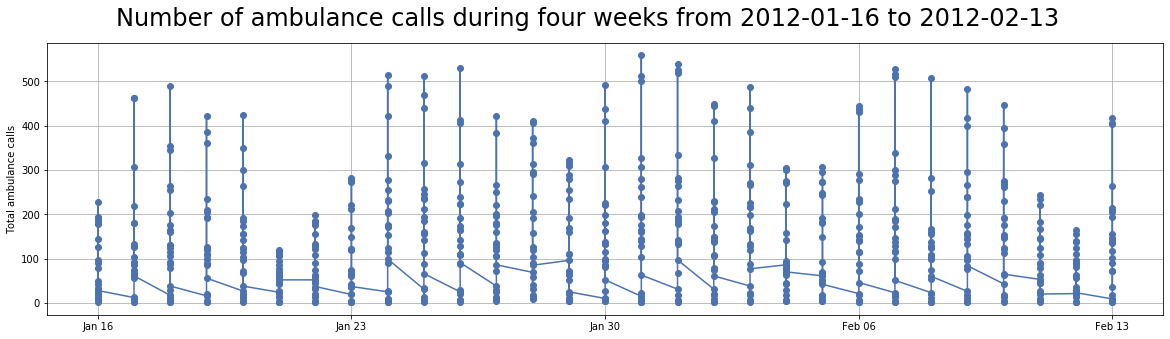

In [23]:
fig, ax = plt.subplots()
ax.plot(data.loc['2012-01-16':'2012-02-13', 'cnt'], marker='o', linestyle='-')
fig.suptitle("Number of ambulance calls during four weeks from 2012-01-16 to 2012-02-13", fontsize=24)
ax.set_ylabel('Total ambulance calls')
fig.set_size_inches(20,5)
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.grid()
fig.subplots_adjust(top=0.88)
plt.show()

The x-axis is divided by weeks. We can notice how the number of ambulance calls increases at the beginning of a week and decreases by its end. This tells us about weekly seasonality. the number of ambulance calls varies by day during the week.

Let's zoom in the data to hourly perspective

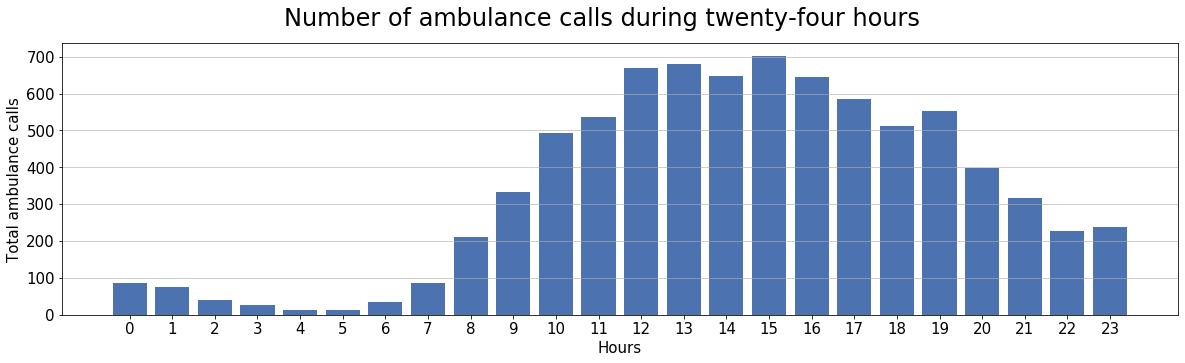

In [22]:
cnt_day = data.loc['2012-06-02']

fig, ax = plt.subplots()
fig.set_size_inches(20,5)
fig.suptitle("Number of ambulance calls during twenty-four hours", fontsize=24)
plt.bar(cnt_day['hr'], cnt_day['cnt'])
plt.xticks(cnt_day['hr'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Total ambulance calls',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.subplots_adjust(top=0.88)
plt.show()

Obviously there is a daily seasonality. The number of ambulance calls varies throughout the day.

Let's take a look at our target feature from a slight distant perspective. We will resample our dataset by day and calculate weekly mean and see whether we can benefit from it.

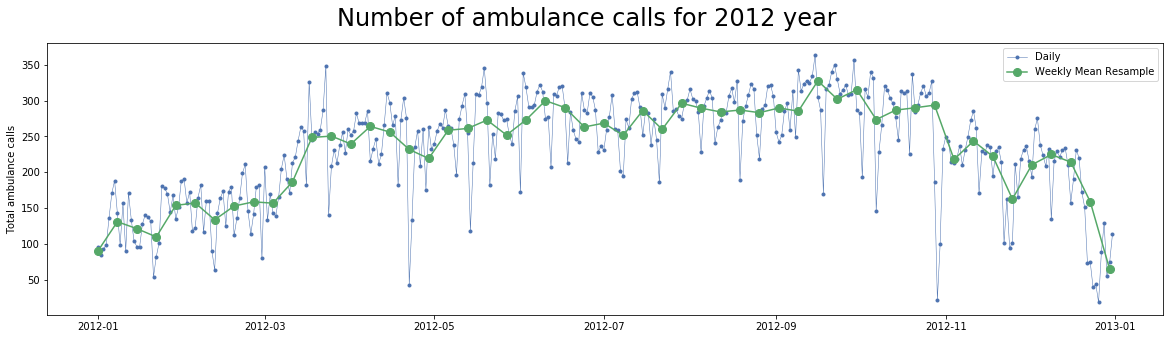

In [24]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['cnt', 'temp', 'hum']
# Resample to weekly frequency, aggregating with mean
cnt_weekly_mean = data[data_columns].resample('W').mean()

cnt_daly_mean = (data[data_columns]).groupby(['date']).mean()

# Start and end of the date range to extract
start, end = '2012-01', '2012-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
fig.suptitle("Number of ambulance calls for 2012 year", fontsize=24)
ax.plot(cnt_daly_mean.loc[start:end, 'cnt'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(cnt_weekly_mean.loc[start:end, 'cnt'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Total ambulance calls')
fig.subplots_adjust(top=0.88)
ax.legend()
plt.show()

This approach made the data more grouped. Now we can clearly see the yearly seasonal trend. 
Also, we can notice the data outliers.

Our main goal for the data wrangling phase is to move from the hourly perspective and group all our dataset by day.

# 2 Data wrangling

Zoom Out the data to get a daily scale

In [6]:
# Create the column 'cnt' and sum the ambulance calls by day
cnt_by_day = data['cnt'].resample('d').sum()
cnt_by_day = cnt_by_day.to_frame(name = 'cnt')
cnt_by_day.shape

(731, 1)

In [7]:
# Create the column 'windspeed' and calculate a mean of the wind speed by day
windspeed_by_day = round(data['windspeed'].resample('d').mean(), 4)
windspeed_by_day = windspeed_by_day.to_frame(name = 'windspeed')
windspeed_by_day.shape

(731, 1)

In [8]:
# Create the column 'hum' and calculate a mean of the humidity by day
hum_by_day = round(data['hum'].resample('d').mean(), 2)
hum_by_day = hum_by_day.to_frame(name = 'hum')
hum_by_day.shape

(731, 1)

In [9]:
# Create the column 'atemp' and calculate a mean of the feeling temperature by day
atemp_by_day = round(data['atemp'].resample('d').mean(), 2)
atemp_by_day = atemp_by_day.to_frame(name = 'atemp')
atemp_by_day.shape

(731, 1)

In [10]:
# Create the column 'temp' and calculate a mean of the temperature by day
temp_by_day = round(data['temp'].resample('d').mean(), 2)
temp_by_day = temp_by_day.to_frame(name = 'temp')
temp_by_day.shape

(731, 1)

Create the column 'weathersit' and select a mode of the weather sit by day because it is a categorical variable

Trying to apply .resample('d').mode() I got an error with a note that mode() can't be applied to the column.
An interesting fact that this method worked on some part of data and on another part didn't.

After a long term investigation, I found that the data set is incomplete.
There is only one observation in 2012-10-29 for 00 hours. Let's take a closer look at the data for this day.

In [0]:
data.loc['2012-10-29']

index          15884
season        winter
yr                 1
mnth              10
hr                 0
holiday            0
weekday            1
workingday         1
weathersit         3
temp            0.44
atemp         0.4394
hum             0.88
windspeed     0.3582
cnt               22
Name: 2012-10-29 00:00:00, dtype: object

So that I came up with an algorithm that helped me to avoid this issue. 

In [11]:
daterange = pd.date_range('2011-01-01', '2012-10-28')
weathersit_day_1 = pd.DataFrame()
weathersit_by_day_1 = pd.DataFrame()

for single_date in daterange:
  weathersit_value_1 = data.loc[single_date.strftime("%Y-%m-%d")]['weathersit'].mode().values[0]
  weathersit_day_1 = pd.DataFrame({'weathersit': weathersit_value_1}, index = [single_date.strftime("%Y-%m-%d")])
  weathersit_by_day_1 = weathersit_by_day_1.append(weathersit_day_1)

weathersit_by_day_1.shape

(667, 1)

In [12]:
daterange = pd.date_range('2012-10-30', '2012-12-31')
weathersit_day_2 = pd.DataFrame()
weathersit_by_day_2 = pd.DataFrame()

for single_date in daterange:
  weathersit_value_2 = data.loc[single_date.strftime("%Y-%m-%d")]['weathersit'].mode().values[0]
  weathersit_day_2 = pd.DataFrame({'weathersit': weathersit_value_2}, index = [single_date.strftime("%Y-%m-%d")])
  weathersit_by_day_2 = weathersit_by_day_2.append(weathersit_day_2)

weathersit_by_day_2.shape

(63, 1)

In [13]:
eathersit_day_3 = pd.DataFrame()
weathersit_value_3 = data.loc['2012-10-29']['weathersit']
weathersit_day_3 = pd.DataFrame({'weathersit': weathersit_value_3}, index = ['2012-10-29'])

weathersit_day_3

,weathersit
2012-10-29,3


In [14]:
weathersit_by_day = pd.concat([weathersit_by_day_1, weathersit_by_day_2], axis=0)
weathersit_by_day = pd.concat([weathersit_by_day, weathersit_day_3], axis=0, sort=True)
weathersit_by_day.shape

(731, 1)

In [15]:
# Create the column 'workingday' and get the first value from the subset of working days values
workingday_by_day = data['workingday'].resample('d').first()
workingday_by_day = workingday_by_day.to_frame(name = 'workingday')
workingday_by_day.shape


(731, 1)

In [16]:
# Create the column 'weekday' and get the first value from the subset of week days values
weekday_by_day = data['weekday'].resample('d').first()
weekday_by_day = weekday_by_day.to_frame(name = 'weekday')
weekday_by_day.shape

(731, 1)

In [17]:
# Create the column 'holiday' and get the first value from the subset of holidays values
holiday_by_day = data['holiday'].resample('d').first()
holiday_by_day = holiday_by_day.to_frame(name = 'holiday')
holiday_by_day.shape

(731, 1)

In [18]:
# Create the column 'mnth' and get the first value from the subset of months
mnth_by_day = data['mnth'].resample('d').first()
mnth_by_day = mnth_by_day.to_frame(name = 'mnth')
mnth_by_day.shape

(731, 1)

In [19]:
# Create the column 'yr' and get the first value from the subset of years
yr_by_day = data['yr'].resample('d').first()
yr_by_day = yr_by_day.to_frame(name = 'yr')
yr_by_day.shape

(731, 1)

In [20]:
# Create the column 'season' and get the first value from the subset of seasons
season_by_day = data['season'].resample('d').first()
season_by_day = season_by_day.to_frame(name = 'season')
season_by_day.shape

(731, 1)

In [21]:
# Merge the DataFrame by day
data_by_day = pd.DataFrame(index=season_by_day.index)
data_by_day = data_by_day.join(season_by_day).join(yr_by_day).join(mnth_by_day).join(holiday_by_day).join(weekday_by_day).join(workingday_by_day).join(weathersit_by_day).join(temp_by_day).join(atemp_by_day).join(hum_by_day).join(windspeed_by_day).join(cnt_by_day)
data_by_day.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
date,,,,,,,,,,,,
2011-01-01,spring,0,1,0,6,0,1,0.34,0.36,0.81,0.1604,985
2011-01-02,spring,0,1,0,0,0,2,0.36,0.35,0.70,0.2485,801
2011-01-03,spring,0,1,0,1,1,1,0.20,0.19,0.44,0.2483,1349


Let's rebuild the plot of the distribution of the ambulance calls by time and compare it with the previous one.

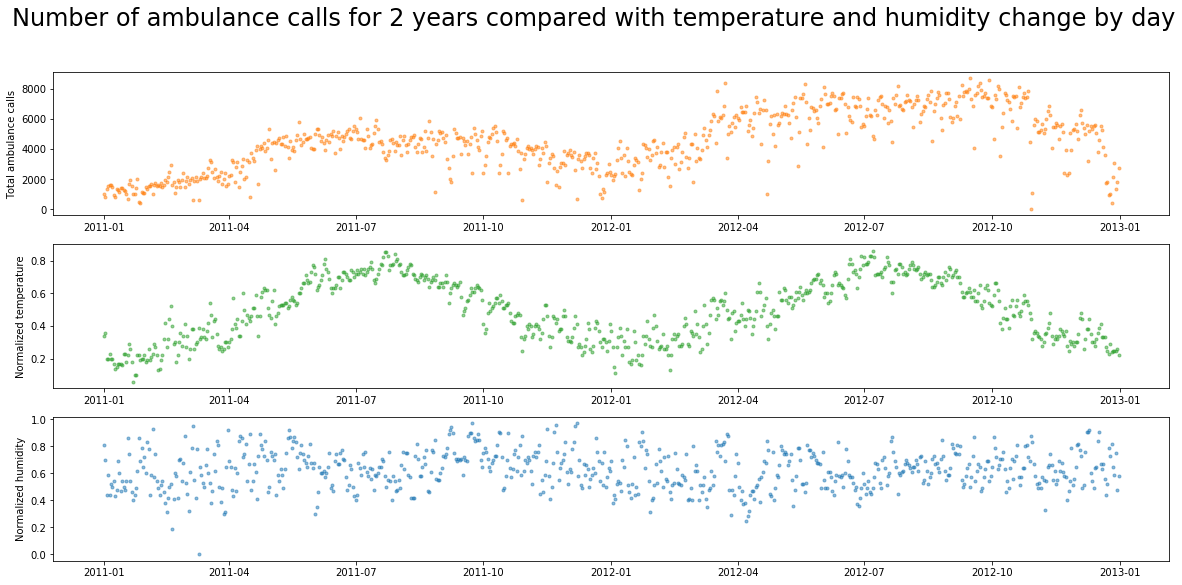

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(20, 9))
fig.suptitle("Number of ambulance calls for 2 years compared with temperature and humidity change by day", fontsize=24)

axes[0].plot(data_by_day['cnt'], marker='.', alpha=0.5, linestyle='None', color='#ff7f0e')
axes[0].set_ylabel('Total ambulance calls')

axes[1].plot(data_by_day['temp'], marker='.', alpha=0.5, linestyle='None', color='#2ca02c')
axes[1].set_ylabel('Normalized temperature')

axes[2].plot(data_by_day['hum'], marker='.', alpha=0.5, linestyle='None', color='#1f77b4')
axes[2].set_ylabel('Normalized humidity')

fig.subplots_adjust(top=0.88)
plt.show()

The data wrangling goal was reached. Now we can visually identify outliers. The dataset became convenient for Exploratory Data Analysis and Anomaly Detection phases

# 3 Descriptive statistics

In [0]:
# Descriptive or Summary Statistic of the numeric columns:
data_by_day.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,6.519836,0.028728,2.997264,0.683995,1.298222,0.495335,0.474323,0.627880,0.190488,4504.348837
std,0.500342,3.451913,0.167155,2.004787,0.465233,0.550203,0.183096,0.162928,0.142569,0.077498,1937.211452
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.060000,0.080000,0.000000,0.022400,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.340000,0.520000,0.135000,3152.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.490000,0.630000,0.181000,4548.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.610000,0.730000,0.233200,5956.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.860000,0.840000,0.970000,0.507500,8714.000000


First of all, we can notice that there is data for 731 days.
Weather sit has only 3 categories from 1 to 3.

The minimum count of ambulance calls is 22 that is significantly lower than the 25th percentile with 3152 ambulance calls. 
We can assume that the minimum value is an outlier.

# 4 Exploratory data analysis

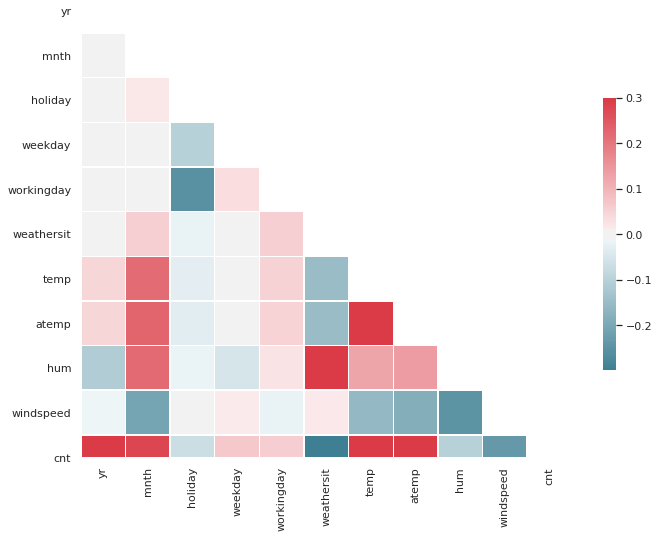

In [0]:
sns.set(style="white")
corr = data_by_day.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

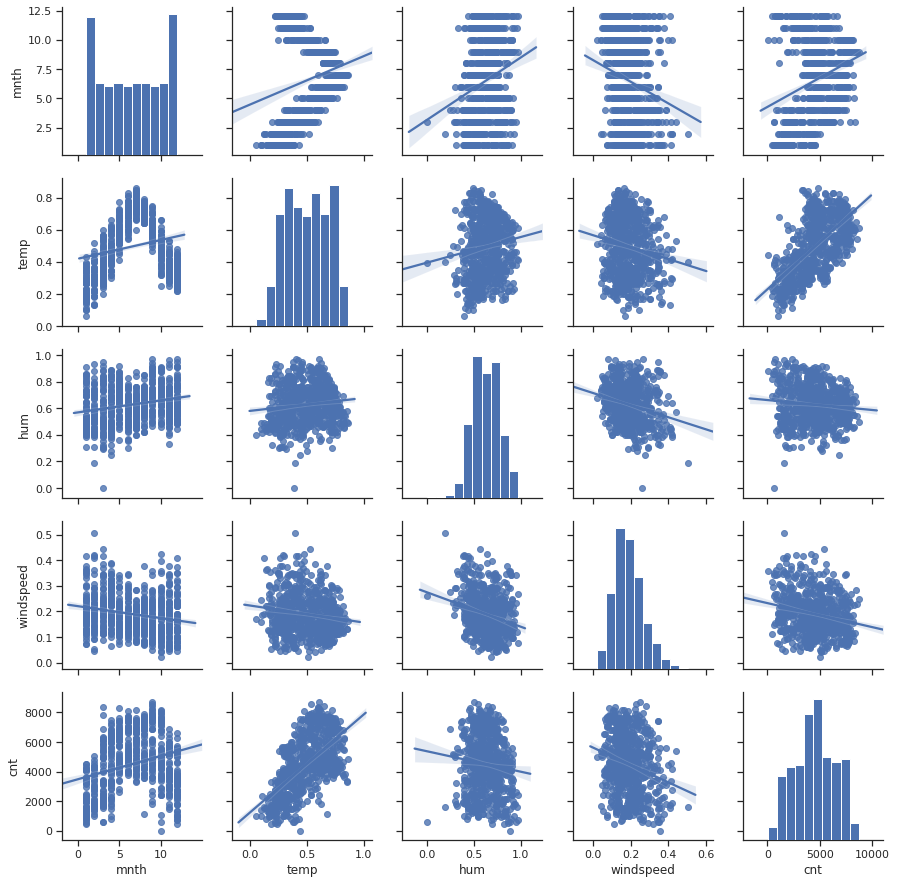

In [0]:
# Correlation matrix
data_pairplot = data_by_day[['mnth', 'temp', 'hum', 'windspeed', 'cnt']]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_pairplot, kind="reg")
plt.show()

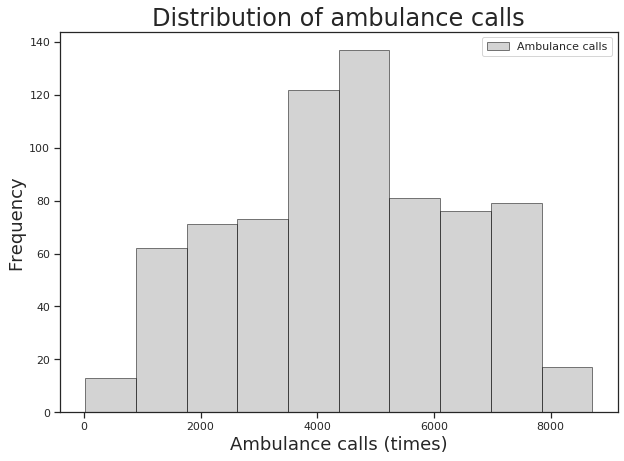

In [0]:
data_by_day.cnt.plot(kind='hist',color='darkgrey',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Ambulance calls'])
plt.title('Distribution of ambulance calls', size=24)
plt.xlabel('Ambulance calls (times)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

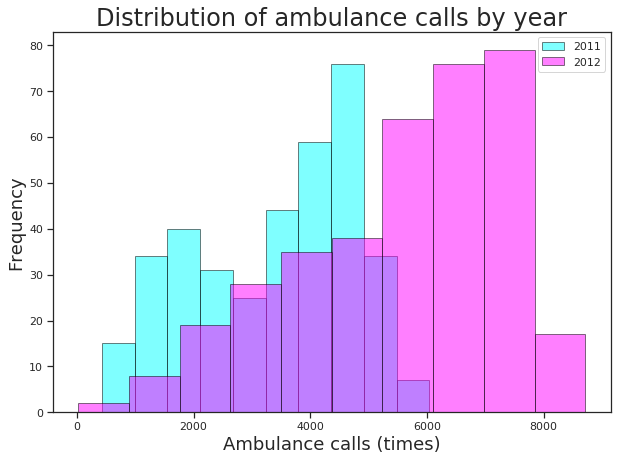

In [0]:
data_by_day[data_by_day['yr']== 0].cnt.plot(kind='hist',color='aqua',edgecolor='black',alpha=0.5,figsize=(10,7))
data_by_day[data_by_day['yr']== 1].cnt.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['2011', '2012'])
plt.title('Distribution of ambulance calls by year', size=24)
plt.xlabel('Ambulance calls (times)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

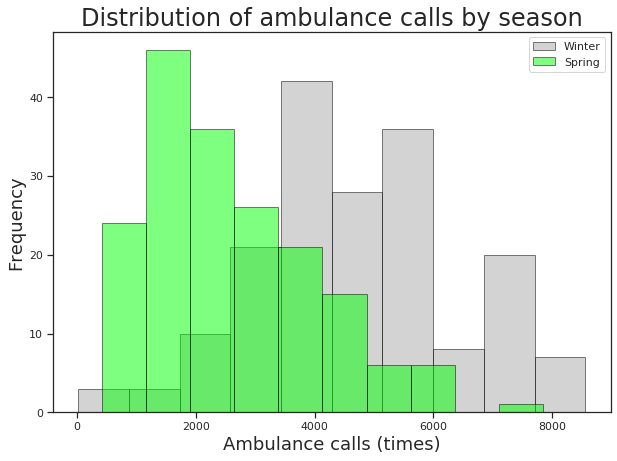

In [0]:
data_by_day[data_by_day['season']=='winter'].cnt.plot(kind='hist',color='darkgrey',edgecolor='black',alpha=0.5,figsize=(10,7))
data_by_day[data_by_day['season']=='spring'].cnt.plot(kind='hist',color='lime',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Winter', 'Spring'])
plt.title('Distribution of ambulance calls by season', size=24)
plt.xlabel('Ambulance calls (times)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

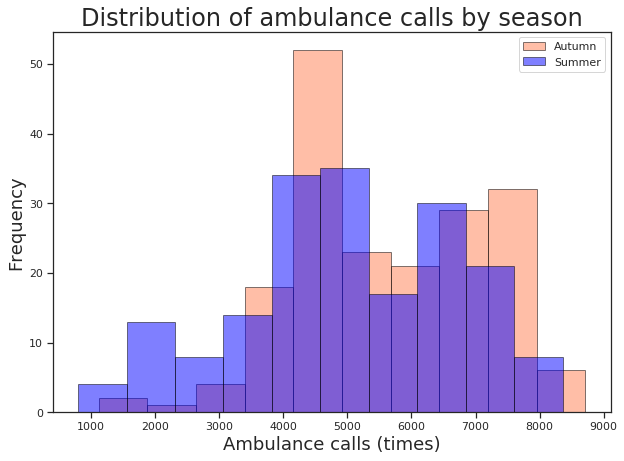

In [0]:
data_by_day[data_by_day['season']=='autumn'].cnt.plot(kind='hist',color='coral',edgecolor='black',alpha=0.5,figsize=(10,7))
data_by_day[data_by_day['season']=='summer'].cnt.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Autumn', 'Summer'])
plt.title('Distribution of ambulance calls by season', size=24)
plt.xlabel('Ambulance calls (times)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

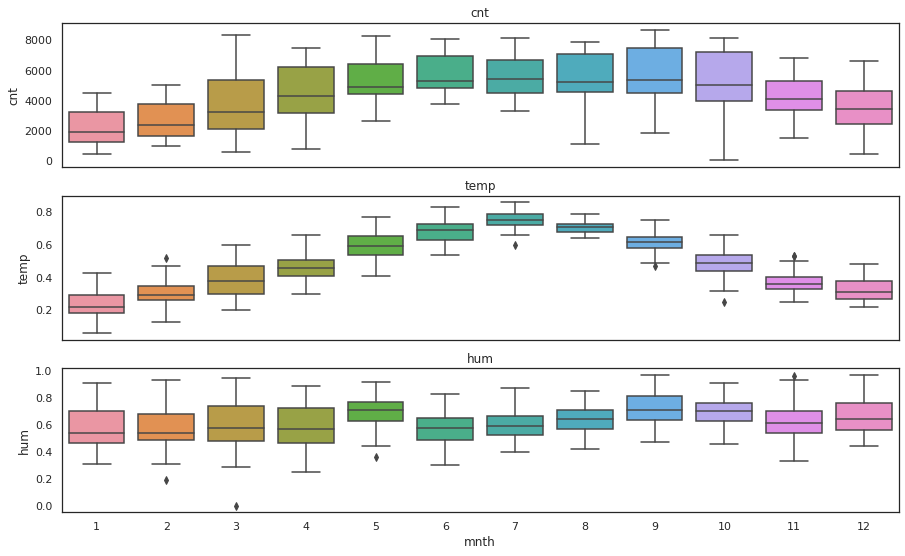

In [0]:
# These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:

fig, axes = plt.subplots(3, 1, figsize=(15, 9), sharex=True)
for name, ax in zip(['cnt', 'temp', 'hum'], axes):
  sns.boxplot(data=data_by_day, x = 'mnth',  y=name, ax=ax)
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
    ax.set_xlabel('')

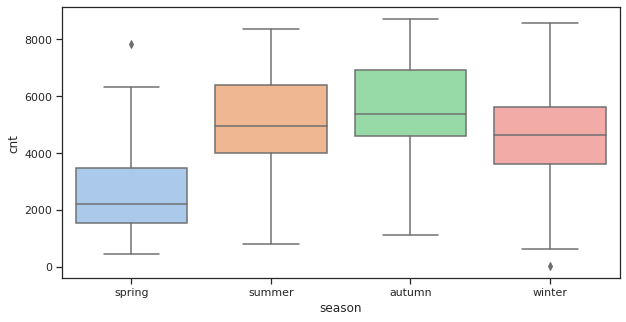

In [0]:
# Let’s further explore the seasonality of our data with box plots

plt.figure(figsize=(10, 5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(data=data_by_day, x='season', y='cnt');

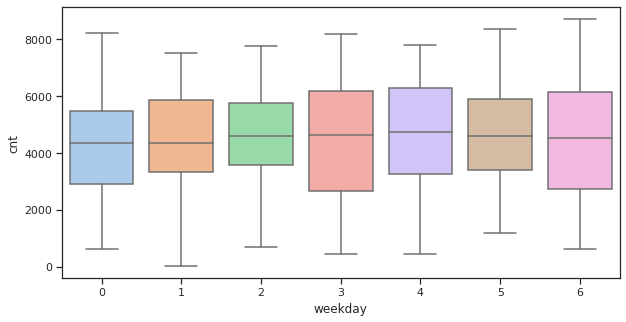

In [0]:
plt.figure(figsize=(10, 5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(data=data_by_day, x='weekday', y='cnt')
plt.show()

# 5 Patterns and anomaly detection. Data cleaning

Coefficients: [ 1.69808436e-07 -3.19241218e-04  2.62426677e-02  2.71133239e+01
  1.67404061e+03]


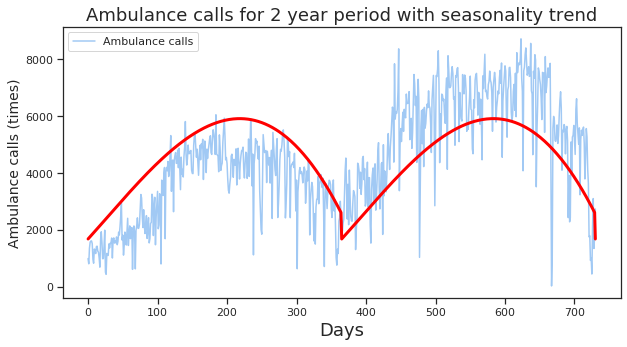

In [0]:
# Remove Seasonality from Time Series Data

series = data_by_day['cnt']
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
plt.figure(figsize=(10, 5))
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.legend(labels=['Ambulance calls'])
plt.title('Ambulance calls for 2 year period with seasonality trend', size=18)
plt.xlabel('Days', size=18)
plt.ylabel('Ambulance calls (times)', size=14)
plt.show()

It was a bad try to distinguish seasonality since the multiplicative component of seasonality is clearly present in the data but we can separate the data by year.

Coefficients: [ 2.36758982e-06 -1.83637405e-03  3.68775806e-01 -8.41997442e-01
  1.10480226e+03]


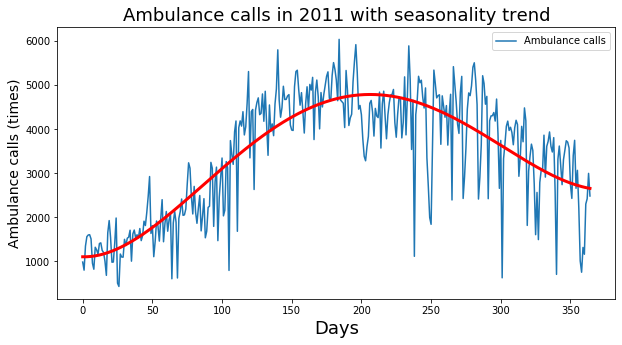

In [0]:
series_2011 = data_by_day[data_by_day['yr']== 0].cnt
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series_2011))]
y = series_2011.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve_2011 = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve_2011.append(value)
# plot curve over original data
plt.figure(figsize=(10, 5))
plt.plot(series_2011.values)
plt.plot(curve_2011, color='red', linewidth=3)
plt.legend(labels=['Ambulance calls'])
plt.title('Ambulance calls in 2011 with seasonality trend', size=18)
plt.xlabel('Days', size=18)
plt.ylabel('Ambulance calls (times)', size=14)
plt.show()

The curve appears to be a good fit for the seasonal structure in the dataset.

We can now use this model to create a seasonally adjusted version of the dataset.

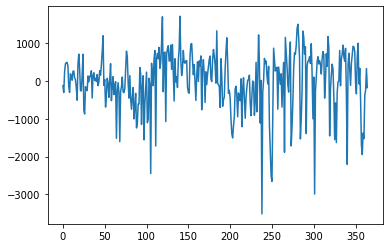

In [0]:
# create seasonally adjusted
values_2011 = series_2011.values
diff_2011 = list()
for i in range(len(values_2011)):
	value_2011 = values_2011[i] - curve_2011[i]
	diff_2011.append(value_2011)
pyplot.plot(diff_2011)
pyplot.show()

# Идея добавить серию diff как колонку в датасет на этапе фичерз селекшен 

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.<br>
Data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

In [0]:
diff_2011_df = pd.DataFrame(diff_2011)
diff_2011_df['id'] = diff_2011_df.index if diff_2011_df.index.is_monotonic_increasing else range(len(diff_2011_df))
diff_2011_df.columns = ['diff','id']
diff_2011_df.head(3)

,diff,id
0,-119.802257,0
1,-303.327201,1
2,244.421288,2


In [0]:
empty_df = pd.DataFrame(index=data_by_day.index)
empty_df.insert(loc=0, column='id', value=np.arange(len(empty_df)))
empty_df.head(3)

,id
date,
2011-01-01,0
2011-01-02,1
2011-01-03,2


In [0]:
# left join 
diff_all = pd.merge(diff_2011_df, empty_df, on='id', how='left')
diff_all.shape

(365, 2)

Coefficients: [-2.07849084e-06  1.23881111e-03 -3.27476901e-01  5.62336525e+01
  2.20789017e+03]


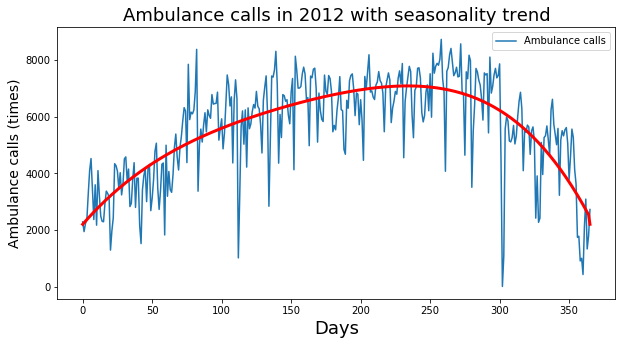

In [0]:
series_2012 = data_by_day[data_by_day['yr']== 1].cnt
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series_2012))]
y = series_2012.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve_2012 = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve_2012.append(value)
# plot curve over original data
plt.figure(figsize=(10, 5))
plt.plot(series_2012.values)
plt.plot(curve_2012, color='red', linewidth=3)
plt.legend(labels=['Ambulance calls'])
plt.title('Ambulance calls in 2012 with seasonality trend', size=18)
plt.xlabel('Days', size=18)
plt.ylabel('Ambulance calls (times)', size=14)
plt.show()

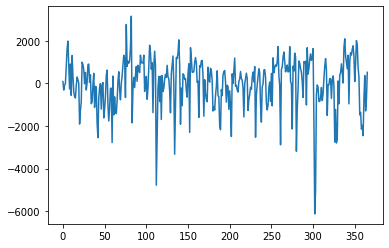

In [0]:
# create seasonally adjusted
values_2012 = series_2012.values
diff_2012 = list()
for i in range(len(values_2012)):
	value_2012 = values_2012[i] - curve_2012[i]
	diff_2012.append(value_2012)
pyplot.plot(diff_2012)
pyplot.show()

In [0]:
diff_2012_df = pd.DataFrame(diff_2012)
diff_2012_df['id'] = diff_2012_df.index if diff_2012_df.index.is_monotonic_increasing else range(len(diff_2012_df))
diff_2012_df.columns = ['diff','id']
diff_2012_df.head(3)

,diff,id
0,86.109832,0
1,-312.797581,1
2,-83.057443,2


In [0]:
frames = [diff_all, diff_2012_df]
diff_all = pd.concat(frames, join='outer', ignore_index=True, keys=None, 
          levels=None, names=None, verify_integrity=False, copy=True, sort=False)
diff_all.shape

(731, 2)

In [0]:
diff_all.iloc[363:367]

,diff,id
363,335.711047,363
364,-172.476707,364
365,86.109832,0
366,-312.797581,1


In [0]:
diff_all.drop(['id'], axis=1).head(3)

,diff
0,-119.802257
1,-303.327201
2,244.421288


In [0]:
diff_all['id'] = diff_all.index if diff_all.index.is_monotonic_increasing else range(len(diff_all))
diff_all.head(3)

,diff,id
0,-119.802257,0
1,-303.327201,1
2,244.421288,2


In [0]:
data_by_day.insert(loc=0, column='id', value=np.arange(len(data_by_day)))
data_by_day.head(3)

,id,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
date,,,,,,,,,,,,,
2011-01-01,0,spring,0,1,0,6,0,1,0.34,0.36,0.81,0.1604,985
2011-01-02,1,spring,0,1,0,0,0,2,0.36,0.35,0.70,0.2485,801
2011-01-03,2,spring,0,1,0,1,1,1,0.20,0.19,0.44,0.2483,1349


In [0]:
data_by_day['date'] = pd.date_range(start ='2011-01-01', periods = 731)

In [0]:
data_by_day.head(3)

,id,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date
date,,,,,,,,,,,,,,
2011-01-01,0,spring,0,1,0,6,0,1,0.34,0.36,0.81,0.1604,985,2011-01-01
2011-01-02,1,spring,0,1,0,0,0,2,0.36,0.35,0.70,0.2485,801,2011-01-02
2011-01-03,2,spring,0,1,0,1,1,1,0.20,0.19,0.44,0.2483,1349,2011-01-03


In [0]:
data_by_day = pd.merge(data_by_day, diff_all, on='id', how='outer')

In [0]:
data_by_day.shape

(731, 15)

In [0]:
data_by_day.head(3)

,id,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date,diff
0,0,spring,0,1,0,6,0,1,0.34,0.36,0.81,0.1604,985,2011-01-01,-119.802257
1,1,spring,0,1,0,0,0,2,0.36,0.35,0.70,0.2485,801,2011-01-02,-303.327201
2,2,spring,0,1,0,1,1,1,0.20,0.19,0.44,0.2483,1349,2011-01-03,244.421288


The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [0]:
z = np.abs(stats.zscore(data_by_day['diff']))
data_by_day['diff'] = data_by_day['diff'].where(z < 3)

In [0]:
data_clean = data_by_day.dropna()

In [0]:
data_clean.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
726,1,1,12,0,4,1,2,0.25,0.65,0.3501,2114
727,1,1,12,0,5,1,2,0.25,0.59,0.1555,3095
728,1,1,12,0,6,0,2,0.25,0.75,0.1244,1341
729,1,1,12,0,0,0,1,0.26,0.48,0.3508,1796
730,1,1,12,0,1,1,1,0.22,0.58,0.1548,2729


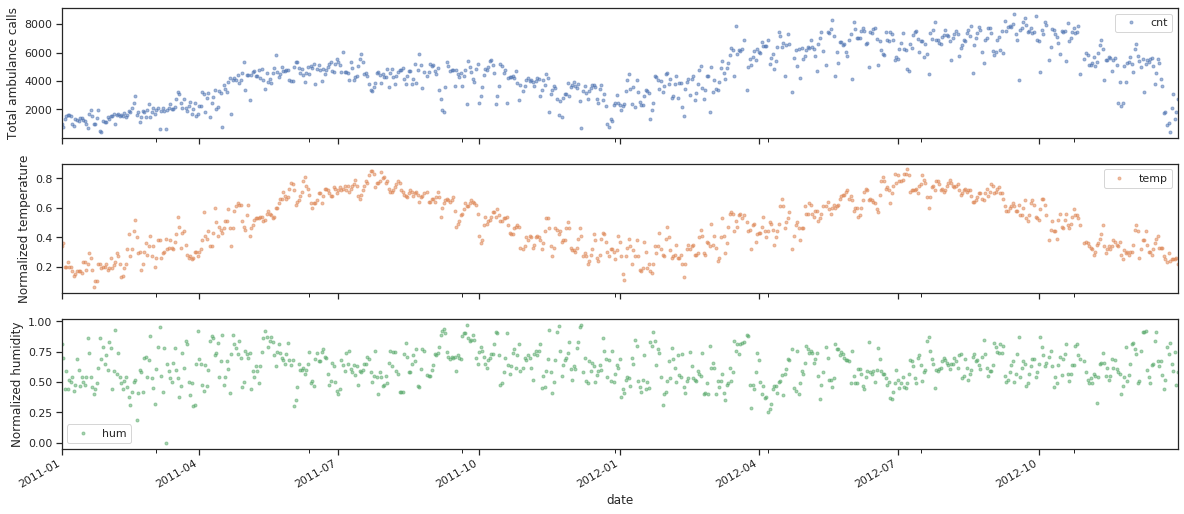

In [0]:
data_clean_show = data_clean.set_index('date')
cols_plot = ['cnt', 'temp', 'hum']
axes = data_clean_show[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 9), subplots=True)
axes[0].set_ylabel('Total ambulance calls')
axes[1].set_ylabel('Normalized temperature')
axes[2].set_ylabel('Normalized humidity')
plt.show()

# 6 Feature engineering

In [0]:
data_clean.head(3)

,id,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date,diff
0,0,spring,0,1,0,6,0,1,0.34,0.36,0.81,0.1604,985,2011-01-01,-119.802257
1,1,spring,0,1,0,0,0,2,0.36,0.35,0.70,0.2485,801,2011-01-02,-303.327201
2,2,spring,0,1,0,1,1,1,0.20,0.19,0.44,0.2483,1349,2011-01-03,244.421288


Remove columns 'id', 'atemp', 'date', 'diff'

In [0]:
columns = ['id', 'atemp', 'date', 'diff']
data_clean = data_clean.drop(columns, axis=1)
data_clean.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,1,0.34,0.81,0.1604,985
1,spring,0,1,0,0,0,2,0.36,0.70,0.2485,801
2,spring,0,1,0,1,1,1,0.20,0.44,0.2483,1349


Convert categorical text data into model-understandable numerical data for 'season' column

In [0]:
# Label Encoding

le = LabelEncoder() 
  
data_clean['season']= le.fit_transform(data_clean['season'])
data_clean.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.34,0.81,0.1604,985
1,1,0,1,0,0,0,2,0.36,0.70,0.2485,801
2,1,0,1,0,1,1,1,0.20,0.44,0.2483,1349


In [0]:
data_encoded = data_clean.copy()
data_encoded.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.34,0.81,0.1604,985
1,1,0,1,0,0,0,2,0.36,0.70,0.2485,801
2,1,0,1,0,1,1,1,0.20,0.44,0.2483,1349


In [0]:
# One Hot Encoding

season_ohe = OneHotEncoder()
yr_ohe = OneHotEncoder()
mnth_ohe = OneHotEncoder()
holiday_ohe = OneHotEncoder()
weekday_ohe = OneHotEncoder()
workingday_ohe = OneHotEncoder()
weathersit_ohe = OneHotEncoder()

X_season = season_ohe.fit_transform(data_encoded.season.values.reshape(-1,1)).toarray()
X_yr = yr_ohe.fit_transform(data_encoded.yr.values.reshape(-1,1)).toarray()
X_mnth = mnth_ohe.fit_transform(data_encoded.mnth.values.reshape(-1,1)).toarray()
X_holiday = holiday_ohe.fit_transform(data_encoded.holiday.values.reshape(-1,1)).toarray()
X_weekday = weekday_ohe.fit_transform(data_encoded.weekday.values.reshape(-1,1)).toarray()
X_workingday = workingday_ohe.fit_transform(data_encoded.workingday.values.reshape(-1,1)).toarray()
X_weathersit = weathersit_ohe.fit_transform(data_encoded.weathersit.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(X_season, columns = ['season'+str(int(i)) for i in range(X_season.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_yr, columns = ['yr'+str(int(i)) for i in range(X_yr.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_mnth, columns = ['mnth'+str(int(i)) for i in range(X_mnth.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_holiday, columns = ['holiday'+str(int(i)) for i in range(X_holiday.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_weekday, columns = ['weekday'+str(int(i)) for i in range(X_weekday.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_workingday, columns = ['workingday'+str(int(i)) for i in range(X_workingday.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(X_weathersit, columns = ['weathersit'+str(int(i)) for i in range(X_weathersit.shape[1])])
data_encoded = pd.concat([data_encoded, dfOneHot], axis=1)

data_encoded.head(3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season0,season1,season2,season3,yr0,yr1,mnth0,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,holiday0,holiday1,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,workingday0,workingday1,weathersit0,weathersit1,weathersit2
0,1.0,0.0,1.0,0.0,6.0,0.0,1.0,0.34,0.81,0.1604,985.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.36,0.70,0.2485,801.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.20,0.44,0.2483,1349.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<h3>Columns description:</h3>

season 0...3: [0 - spring, 1 - summer, 2 - autumn, 3 - winter] 	
yr 0...1:	[0 - 2011, 1 - 2012]<br>
mnth 0...11:	[1 to 12]<br>
holiday 0...1:	[1 - holiday, 0 - not holiday]<br>
weekday 0...6:	[1 - Monday]	
workingday 0...1:	[if day is neither weekend nor holiday is 1, otherwise is 0]	
weathersit 0...2:	
0.   Clear, Few clouds, Partly cloudy, Partly cloudy
1.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
2.   Light Snow, Light Rain + Thunderstorm + Scattered cloud



In [0]:
data_encoded.shape

(731, 43)

In [0]:
data_encoded1 = data_encoded.copy()

In [0]:
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data_encoded = data_encoded.drop(columns, axis=1)
data_encoded.head(3)

,temp,hum,windspeed,cnt,season0,season1,season2,season3,yr0,yr1,mnth0,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,holiday0,holiday1,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,workingday0,workingday1,weathersit0,weathersit1,weathersit2
728,0.25,0.75,0.1244,1341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,0.26,0.48,0.3508,1796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,0.22,0.58,0.1548,2729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data_encoded = data_encoded.dropna()

In [0]:
data_encoded.shape

(715, 36)

# 7 Data modeling. Linear Regression

Finally, the ‘cnt’ column is dropped in the X variable and set as the target in the Y variable.

In [0]:
X = data_encoded.drop('cnt', axis=1)
y = data_encoded[['cnt']]

Finally, we’ll split the dataset into a train set and a test set. Scikit-learn has a very straightforward train_test_split function for that

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

we can start building the regression model. First, let’s try a model with only one variable. We want to predict the cnt by looking at the temperature.

In [0]:
reg = LinearRegression()
reg.fit(X_train[['temp']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have our model, we can check how well it performs. In the first instance, we run the model on our test set. Some good evaluation metrics for linear regression are mean squared error and the R² score.

In [0]:
y_predicted = reg.predict(X_test[['temp']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 2089273.47
R²: 0.45


We get a model with a mean squared error of 2089273.47 and an R² of 0.45. That’s … okay. But we can do better, right? Of course we can! Let’s add more variables to the model. 

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 708037.31
R²: 0.82


By using a model with three variables instead of one, we get to a model with a mean squared error of 708037.31 and an R² score of 0.82. That’s definitely a nice improvement!

By plotting the true Y values of our test set and the Y values that our model predicts, we can inspect its performance visually.

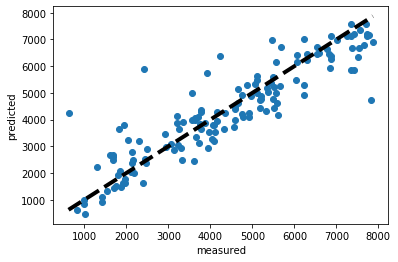

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

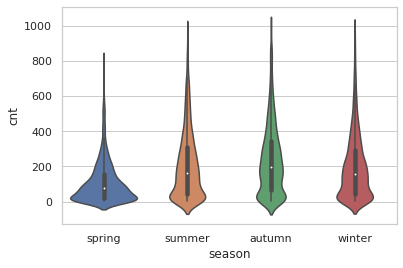

In [19]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=data['season'], y=data['cnt'], data=data)